In [1]:
import numpy as np
import scipy.linalg as la

def simple_bipartite_matching(adjacency_matrix):
    n = adjacency_matrix.shape[1]  # Number of columns (vertices in one partition)
    B = np.linalg.inv(adjacency_matrix)
    M = []  # Initialize the matching as an empty list

    for c in range(n):
        # Find an unmatched row (r) such that B[r, c] == 0
        r_candidates = [r for r in range(n) if B[r, c] == 0]

        if len(r_candidates) > 0:
            r = r_candidates[0]  # Select the first unmatched row
            M.append((c, r))  # Add the edge (u_c, v_r) to the matching

            # Eliminate the r-th row and the c-th column of B
            B = np.delete(B, r, axis=0)
            B = np.delete(B, c, axis=1)

    return M




In [2]:
# Complete bipartite is singular. Non-invertible.
"""
from networkx.algorithms import bipartite
n1 = 10
n2 = 10

G = bipartite.complete_bipartite_graph(n1, n2)
"""

'\nfrom networkx.algorithms import bipartite\nn1 = 10\nn2 = 10\n\nG = bipartite.complete_bipartite_graph(n1, n2)\n'

In [3]:
from networkx.algorithms import bipartite
#random_graph(n, m, p[, seed, directed])
n = 20
m = 20
p = 0.6
seed = 1
directed = False
G = bipartite.random_graph(n, m, p, seed, directed)

In [4]:
# Complete bipartite is singular. Non-invertible.

from networkx.algorithms import bipartite
n1 = 10
n2 = 12

G = bipartite.complete_bipartite_graph(n1, n2)


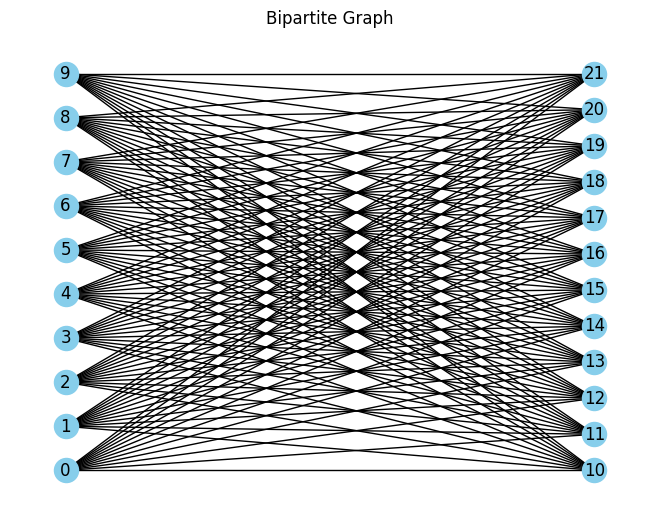

In [5]:
# Draw the graph with the perfect matching edges highlighted
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
# Get the nodes in each partition
partition1_nodes, partition2_nodes = bipartite.sets(G)
# Use bipartite_layout for bipartite graph visualization
pos = nx.bipartite_layout(G, partition1_nodes)
nx.draw(G, pos=pos, with_labels=True, node_color='skyblue', node_size=300)
plt.title("Bipartite Graph")
plt.show()

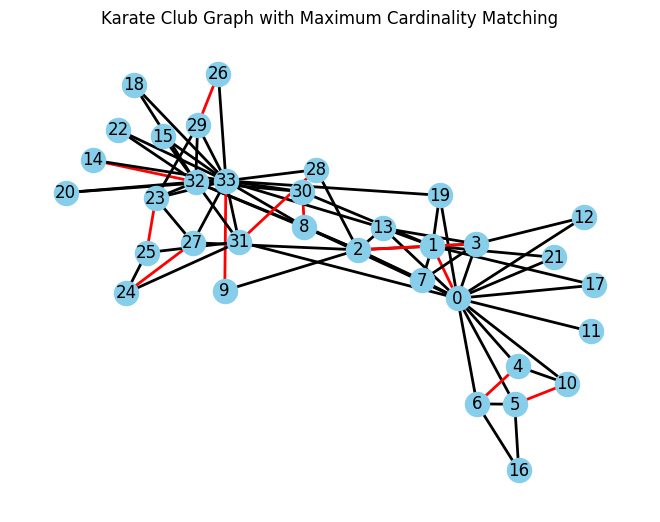

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create the Karate Club graph
G = nx.karate_club_graph()

# Find the maximum cardinality matching
matching = nx.maximal_matching(G)

# Create a list of edge colors, red for edges in the matching and black for others
edge_colors = ['r' if edge in matching or (edge[1], edge[0]) in matching else 'k' for edge in G.edges()]

# Draw the graph with edges in the matching as bold red
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color=edge_colors, width=2.0)
plt.title("Karate Club Graph with Maximum Cardinality Matching")
plt.show()


In [7]:
# Convert the graph to a SciPy sparse matrix
mat = nx.to_scipy_sparse_array(G,format="csc")

# Print the SciPy sparse matrix (in Compressed Sparse Column format, CSC)
print(mat)

  (1, 0)	4
  (2, 0)	5
  (3, 0)	3
  (4, 0)	3
  (5, 0)	3
  (6, 0)	3
  (7, 0)	2
  (8, 0)	2
  (10, 0)	2
  (11, 0)	3
  (12, 0)	1
  (13, 0)	3
  (17, 0)	2
  (19, 0)	2
  (21, 0)	2
  (31, 0)	2
  (0, 1)	4
  (2, 1)	6
  (3, 1)	3
  (7, 1)	4
  (13, 1)	5
  (17, 1)	1
  (19, 1)	2
  (21, 1)	2
  (30, 1)	2
  :	:
  (18, 32)	1
  (20, 32)	3
  (22, 32)	2
  (23, 32)	5
  (29, 32)	4
  (30, 32)	3
  (31, 32)	4
  (33, 32)	5
  (8, 33)	4
  (9, 33)	2
  (13, 33)	3
  (14, 33)	2
  (15, 33)	4
  (18, 33)	2
  (19, 33)	1
  (20, 33)	1
  (22, 33)	3
  (23, 33)	4
  (26, 33)	2
  (27, 33)	4
  (28, 33)	2
  (29, 33)	2
  (30, 33)	3
  (31, 33)	4
  (32, 33)	5


In [8]:
# Lovasz generalized Tutte’s theorem shows that the rank of the Tutte
# matrix gives the size of the maximum matching in the graph.
from scipy.sparse.csgraph import structural_rank

# Set the random seed to 13
np.random.seed(13)

# Get the number of non-zero elements (nnz) in the matrix
nnz = mat.nnz

# Multiply the data array in place by random integers between 0 and nnz
random_integers = np.random.randint(1, nnz + 1, size=nnz)
mat.data = random_integers

# Rank of Tutte
r = structural_rank(mat)
print("Rank",r)
print("Upper bound |M|",r//2)
print("Ground truth |M|",len(matching))
# Print the modified SciPy sparse matrix (in CSC format)
print(mat)

Rank 27
Upper bound |M| 13
Ground truth |M| 11
  (1, 0)	83
  (2, 0)	75
  (3, 0)	17
  (4, 0)	99
  (5, 0)	154
  (6, 0)	155
  (7, 0)	127
  (8, 0)	75
  (10, 0)	74
  (11, 0)	76
  (12, 0)	53
  (13, 0)	3
  (17, 0)	148
  (19, 0)	150
  (21, 0)	148
  (31, 0)	140
  (0, 1)	76
  (2, 1)	2
  (3, 1)	147
  (7, 1)	25
  (13, 1)	12
  (17, 1)	41
  (19, 1)	77
  (21, 1)	59
  (30, 1)	23
  :	:
  (18, 32)	20
  (20, 32)	77
  (22, 32)	146
  (23, 32)	73
  (29, 32)	17
  (30, 32)	70
  (31, 32)	97
  (33, 32)	118
  (8, 33)	16
  (9, 33)	125
  (13, 33)	33
  (14, 33)	142
  (15, 33)	139
  (18, 33)	90
  (19, 33)	96
  (20, 33)	144
  (22, 33)	124
  (23, 33)	21
  (26, 33)	46
  (27, 33)	146
  (28, 33)	7
  (29, 33)	23
  (30, 33)	151
  (31, 33)	39
  (32, 33)	124


In [9]:
import scipy.sparse as sps
def delete_col_csc(mat, i):
    if not isinstance(mat, sps.csc_matrix):
        raise ValueError("Works only for CSC format -- use .tocsc() first")
    
    n = mat.indptr[i+1] - mat.indptr[i]
    if n > 0:
        mat.data[mat.indptr[i]:-n] = mat.data[mat.indptr[i+1]:]
        mat.data = mat.data[:-n]
        mat.indices[mat.indptr[i]:-n] = mat.indices[mat.indptr[i+1]:]
        mat.indices = mat.indices[:-n]

    mat.indptr[i+1:] -= n
    mat._shape = (mat._shape[0]-1, mat._shape[1]-1)

In [10]:
import scipy.sparse as sps
import numpy as np
def delete_rows_csr(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSR sparse matrix ``mat``.
    """
    if not isinstance(mat, sps.csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]

In [11]:
import scipy.sparse as sps
import numpy as np
def delete_cols_csc(mat, indices):
    """
    Remove the rows denoted by ``indices`` form the CSC sparse matrix ``mat``.
    """
    if not isinstance(mat, sps.csc_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")
    indices = list(indices)
    mask = np.ones(mat.shape[0], dtype=bool)
    mask[indices] = False
    return mat[mask]

In [12]:

csr=mat.tocsr()
print(csr.shape)
csr2=delete_rows_csr(csr,[0])
print(csr2.shape)
mat2 = mat
delete_col_csc(mat2,0)
print(mat.shape)
print(mat2.shape)


(34, 34)
(33, 34)
(33, 33)
(33, 33)


In [13]:
import numpy as np

# Define the number of columns in the matrix
num_columns = 4  # Change to the number of columns in your matrix

# Generate all possible combinations of masks
total_combinations = 2 ** num_columns
for mask_value in range(total_combinations):
    # Convert the mask value to a binary representation
    binary_mask = bin(mask_value)[2:].zfill(num_columns)
    
    # Create a mask by converting the binary string to a list of integers
    mask = [int(bit) for bit in binary_mask]
    
    # Use the mask for your calculations or processing
    print(f"Mask Value: {mask_value}, Mask: {mask}")
    

Mask Value: 0, Mask: [0, 0, 0, 0]
Mask Value: 1, Mask: [0, 0, 0, 1]
Mask Value: 2, Mask: [0, 0, 1, 0]
Mask Value: 3, Mask: [0, 0, 1, 1]
Mask Value: 4, Mask: [0, 1, 0, 0]
Mask Value: 5, Mask: [0, 1, 0, 1]
Mask Value: 6, Mask: [0, 1, 1, 0]
Mask Value: 7, Mask: [0, 1, 1, 1]
Mask Value: 8, Mask: [1, 0, 0, 0]
Mask Value: 9, Mask: [1, 0, 0, 1]
Mask Value: 10, Mask: [1, 0, 1, 0]
Mask Value: 11, Mask: [1, 0, 1, 1]
Mask Value: 12, Mask: [1, 1, 0, 0]
Mask Value: 13, Mask: [1, 1, 0, 1]
Mask Value: 14, Mask: [1, 1, 1, 0]
Mask Value: 15, Mask: [1, 1, 1, 1]


In [14]:
import numpy as np

def convolution_with_fft(arr, window):
    # Calculate the size of the FFT based on the input array and window size
    fft_size = len(arr) + len(window) - 1

    # Perform FFT on the input array and window
    fft_arr = np.fft.fft(arr, fft_size)
    fft_window = np.fft.fft(window, fft_size)

    # Calculate the element-wise product of the FFT results
    conv_fft = fft_arr * fft_window

    # Perform inverse FFT to get the convolution result
    result = np.fft.ifft(conv_fft).real  # Use real part to remove small imaginary parts

    return result


In [15]:
print(mat.shape)
print(mat.indices)
print(mat.indptr)
# Assuming mat.indptr is a NumPy array
nonzero_columns = [mat.indptr[i+1] - mat.indptr[i] > 0 for i in range(len(mat.indptr) - 1)]
print(nonzero_columns)
nonzero_columns_indices = [i for i in range(len(mat.indptr) - 1) if mat.indptr[i+1] - mat.indptr[i] > 0]
print(nonzero_columns_indices)

(33, 33)
[ 0  2  3  7 13 17 19 21 30  0  1  3  7  8  9 13 27 28 32  0  1  2  7 12
 13  0  6 10  0  6 10 16  0  4  5 16  0  1  2  3  0  2 30 32 33  2 33  0
  4  5  0  0  3  0  1  2  3 33 32 33 32 33  5  6  0  1 32 33  0  1 33 32
 33  0  1 32 33 25 27 29 32 33 25 27 31 23 24 31 29 33  2 23 24 33  2 31
 33 23 26 32 33  1  8 32 33  0 24 25 28 32 33  2  8 14 15 18 20 22 23 29
 30 31 33  8  9 13 14 15 18 19 20 22 23 26 27 28 29 30 31 32]
[  0   0   9  19  25  28  32  36  40  45  47  50  51  53  58  60  62  64
  66  68  71  73  75  77  82  85  88  90  94  97 101 105 111 123 140]
[False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [16]:
"""
from itertools import combinations, islice
from math import comb
from tqdm import tqdm

# Define the list of indices
indices = nonzero_columns_indices

# Iterate over the length of combinations (from 1 to the maximum length)
for r in range(1, len(indices) + 1):
    # Calculate the number of combinations of length r
    length_combinations_r = comb(len(indices), r)
    
    # Create a progress bar for the current combination length
    pbar = tqdm(total=length_combinations_r, desc=f"Length {r} Combinations", dynamic_ncols=True)

    for i in range(length_combinations_r):
        # Generate the ith combination of length r and print it
        combination_i = next(islice(combinations(indices, r), i, None))
        #print(combination_i)
        
        # Update the progress bar
        pbar.update(1)

    # Close the progress bar for the current combination length
    pbar.close()
    
"""


'\nfrom itertools import combinations, islice\nfrom math import comb\nfrom tqdm import tqdm\n\n# Define the list of indices\nindices = nonzero_columns_indices\n\n# Iterate over the length of combinations (from 1 to the maximum length)\nfor r in range(1, len(indices) + 1):\n    # Calculate the number of combinations of length r\n    length_combinations_r = comb(len(indices), r)\n    \n    # Create a progress bar for the current combination length\n    pbar = tqdm(total=length_combinations_r, desc=f"Length {r} Combinations", dynamic_ncols=True)\n\n    for i in range(length_combinations_r):\n        # Generate the ith combination of length r and print it\n        combination_i = next(islice(combinations(indices, r), i, None))\n        #print(combination_i)\n        \n        # Update the progress bar\n        pbar.update(1)\n\n    # Close the progress bar for the current combination length\n    pbar.close()\n    \n'

In [17]:

from itertools import combinations, islice
from math import comb
from tqdm import tqdm
import multiprocessing

# Define a function to generate and print combinations within a chunk
def generate_and_print_combinations(args):
    chunk, indices, r = args
    pbar = tqdm(total=len(chunk), desc=f"Length {r} Combinations", dynamic_ncols=True)
    for i in chunk:
        combination_i = next(islice(combinations(indices, r), i, None))
        # Print or process the combination as needed
        # print(combination_i)
        pbar.update(1)
    pbar.close()


In [18]:
"""
from itertools import combinations, islice
from math import comb
from tqdm import tqdm

# Define the list of indices
indices = nonzero_columns_indices
maxCombLength = len(indices)

maxCombLength = 4
# Iterate over the length of combinations (from 1 to the maximum length)
for r in range(1, maxCombLength + 1):
    # Calculate the number of combinations of length r
    length_combinations_r = comb(len(indices), r)
    
    # Create a progress bar for the current combination length
    pbar = tqdm(total=length_combinations_r, desc=f"Length {r} Combinations", dynamic_ncols=True)

    for i in range(length_combinations_r):
        # Generate the ith combination of length r and print it
        combination_i = next(islice(combinations(indices, r), i, None))
        #print(combination_i)
        
        # Update the progress bar
        pbar.update(1)

    # Close the progress bar for the current combination length
    pbar.close()
    
"""

Length 4 Combinations: 100%|████████████| 40920/40920 [00:06<00:00, 6664.80it/s]


In [69]:
"""
import multiprocessing
from itertools import combinations, islice
from math import comb
from tqdm import tqdm

# Define a function to generate combinations within a chunk and count them
def generate_and_count_combinations(chunk, indices, r, pbar_dict):
    count = 0
    combinations_iter = islice(combinations(indices, r), chunk.start, chunk.stop)
    for _ in combinations_iter:
        count += 1
    return count

# Define the list of indices
indices = nonzero_columns_indices
maxCombLength = len(indices)

maxCombLength = 5

# Create a multiprocessing pool with the desired number of processes
num_processors = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=num_processors)

# Create a shared counter for each combination length
with multiprocessing.Manager() as manager:
    pbar_dict = {r: manager.Value('i', 0) for r in range(1, maxCombLength + 1)}

    # Iterate over the length of combinations (from 1 to the maximum length)
    for r in range(1, maxCombLength + 1):
        # Calculate the number of combinations of length r
        length_combinations_r = comb(len(indices), r)

        # Create a progress bar for the current combination length
        pbar = tqdm(total=length_combinations_r, desc=f"Length {r} Combinations", dynamic_ncols=True)

        # Divide the combinations into chunks for parallel processing
        chunk_size = length_combinations_r // num_processors
        chunks = [slice(start, start + chunk_size) for start in range(0, length_combinations_r, chunk_size)]

        # Run the chunks in parallel and count combinations asynchronously
        results = [pool.apply_async(generate_and_count_combinations, args=(chunk, indices, r, pbar_dict[r])) for chunk in chunks]

        # Continue with other tasks or processing while workers are running
        while not all(result.ready() for result in results):
            continue
        # Check and update progress as workers return
        for result in results:
            if result.ready():
                count = result.get()
                pbar_dict[r].value += count
                pbar.update(count)
                    
        print(pbar_dict[r].value)
        print(length_combinations_r)


        # Manually set the progress to 100% at the end
        #pbar.n = pbar.last_print_n = length_combinations_r
        #pbar.update(0)
        pbar.close()

# Close the multiprocessing pool
pool.close()
pool.join()
"""

Length 1 Combinations: 100%|██████████████████| 33/33 [00:00<00:00, 1381.25it/s]


33
33


Length 2 Combinations: 100%|███████████████| 528/528 [00:00<00:00, 28771.03it/s]


528
528


Length 3 Combinations: 100%|████████████| 5456/5456 [00:00<00:00, 187246.33it/s]


5456
5456


Length 4 Combinations: 100%|██████████| 40920/40920 [00:00<00:00, 752995.07it/s]


40920
40920


Length 5 Combinations: 100%|███████| 237336/237336 [00:00<00:00, 6951677.30it/s]

237336
237336


In [74]:
import multiprocessing
from itertools import combinations, islice
from math import comb
from tqdm import tqdm

# Define a function to generate combinations within a chunk and count them
def generate_and_count_combinations(chunk, indices, r, pbar_dict, added_flags):
    count = 0
    combinations_iter = islice(combinations(indices, r), chunk.start, chunk.stop)
    for _ in combinations_iter:
        count += 1
    return count, chunk

# Define the list of indices
indices = nonzero_columns_indices
maxCombLength = len(indices)

maxCombLength = 10

# Create a multiprocessing pool with the desired number of processes
num_processors = multiprocessing.cpu_count()
pool = multiprocessing.Pool(processes=num_processors)

# Create a shared counter for each combination length
with multiprocessing.Manager() as manager:
    pbar_dict = {r: manager.Value('i', 0) for r in range(1, maxCombLength + 1)}

    # Iterate over the length of combinations (from 1 to the maximum length)
    for r in range(1, maxCombLength + 1):
        # Calculate the number of combinations of length r
        length_combinations_r = comb(len(indices), r)

        # Create a progress bar for the current combination length
        pbar = tqdm(total=length_combinations_r, desc=f"Length {r} Combinations", dynamic_ncols=True)

        # Divide the combinations into chunks for parallel processing
        chunk_size = length_combinations_r // num_processors
        chunks = [slice(start, start + chunk_size) for start in range(0, length_combinations_r, chunk_size)]

        # Create a list of boolean flags to track added counts
        added_flags = [False] * len(chunks)

        # Run the chunks in parallel and count combinations asynchronously
        results = [pool.apply_async(generate_and_count_combinations, args=(chunk, indices, r, pbar_dict[r], added_flags)) for chunk in chunks]

        # Continue with other tasks or processing while workers are running
        while not all(result.ready() for result in results):
            # Check and update progress as workers return
            for result in results:
                count, chunk = result.get()
                if not added_flags[chunks.index(chunk)]:
                    pbar_dict[r].value += count
                    pbar.update(count)
                    added_flags[chunks.index(chunk)] = True  # Mark the flag as True for this chunk
                    
        assert(pbar_dict[r].value==length_combinations_r)

        # Manually set the progress to 100% at the end
        #pbar.n = pbar.last_print_n = length_combinations_r
        #pbar.update(0)
        pbar.close()

# Close the multiprocessing pool
pool.close()
pool.join()


Length 10 Combinations: 100%|█| 92561040/92561040 [00:01<00:00, 58091871.69it/s]


In [ ]:
import numpy as np
# Determine which columns are nonzero
nonzero_columns = np.diff(mat.indptr) > 0
print(nonzero_columns)
# Generate masks for nonzero columns
masks_for_nonzero_columns = []

for column_index, is_nonzero in enumerate(nonzero_columns):
    if is_nonzero:
        # Create a mask for this nonzero column (1 for the column, 0 for others)
        mask = np.zeros(mat.shape[1], dtype=int)
        mask[column_index] = 1
        masks_for_nonzero_columns.append(mask)

# Now, masks_for_nonzero_columns contains masks for the nonzero columns
for mask in masks_for_nonzero_columns:
    print(mask)

In [ ]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

# Enable interactive mode for Matplotlib
plt.ion()

# Create an empty list to store ranks
ranks = []
rank_ind = []

# Set the number of iterations (x)
num_iterations = mat.shape[0]

# Set the random seed to 13
np.random.seed(13)

# Get the number of non-zero elements (nnz) in the matrix
nnz = mat.nnz

# Multiply the data array in place by random integers between 1 and nnz
random_integers = np.random.randint(1, nnz + 1, size=nnz)
for x in range(0, num_iterations):
    newMat = mat
    delete_col_csc(newMat,x)
    for y in range(0, num_iterations):
        delete_col_csc(newMat,y)
        #print(mat.data)
        # Calculate the invertibility of the new Tutte matrix
        invMat = scipy.sparse.linalg.inv(mat)
        try:
            invMat = scipy.sparse.linalg.inv(mat)
            ranks.append(True)
            print("Found perfect matching")
            break
        except Exception:
            ranks.append(False)
            # Print the final ranks
count_true = ranks.count(True)
print(count_true)

In [ ]:
import numpy as np
import scipy as sp
import scipy.sparse
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt
%matplotlib inline
plt.spy(mat, aspect='equal', marker='.', markersize=1)

In [ ]:
"""

import scipy.sparse as sps
import numpy as np

# Get the number of rows in the CSC matrix
num_rows = mat.shape[0]

# Initialize a list to store the invertibility results
invertibility_results = []

# Iterate over all rows
for row_index in range(num_rows):
    # Explicitly select the columns for the row using indices
    cols_to_select = [col for col in range(mat.shape[1]) if mat[row_index, col] != 0]
    
    # Slice the submatrix using explicit indices
    submatrix = mat[:, cols_to_select].tocsc()

    # Attempt to invert the submatrix
    try:
        inv_submatrix = sps.linalg.inv(submatrix)
        invertibility_results.append(True)
    except sps.linalg.LinAlgError:
        invertibility_results.append(False)

# Print the invertibility results for each row
for row_index, is_invertible in enumerate(invertibility_results):
    print(f"Row {row_index}: {'Invertible' if is_invertible else 'Not Invertible'}")
"""

In [ ]:
invMat = scipy.sparse.linalg.inv(mat)

In [ ]:

import scipy.sparse as sps
import numpy as np

# Get the number of rows in the CSC matrix
num_rows = mat.shape[0]
num_cols = mat.shape[1]

# Initialize a list to store the invertibility results
invertibility_results = []
print(mat.data)
# Iterate over all rows
for c in range(num_rows):
    # Explicitly select the columns for the row using indices
    cols_to_select = [col for col in range(invMat.shape[1]) if invMat[c, col] != 0]
    rows_to_select = [row for row in range(mat.shape[0]) if mat[row,c] != 0]

    print(c)
    print(cols_to_select)
    print(rows_to_select)
    eligible_rows = set(rows_to_select) & set(cols_to_select)
    print(eligible_rows)
    if (len(eligible_rows)>0):
        row_to_remove = eligible_rows.pop()
        print(row_to_remove)
        # Create row index arrays for the slices, excluding the row to skip
        row_indices = np.delete(np.arange(invMat.shape[0]), row_to_remove)
        col_indices = np.delete(np.arange(invMat.shape[1]), c)

        print(invMat.shape)
        # Extract a submatrix

        newInvMatCol = invMat[:, col_indices]
        print(newInvMatCol.shape)
        newInvMatRow = newInvMatCol[row_indices, :]
        print(newInvMatRow.shape)


        """
        mat.getrow(row_to_remove)
        mat.getcol(c)
        #print("remove row",row_to_remove)
        # Set the data of row_to_remove to 0 in the mat matrix
        print(mat.data)
        mat.data[mat.indptr[row_to_remove]:mat.indptr[row_to_remove+1]] = 0
        # Set the data of row_to_remove to 0 in the invMat matrix
        print(mat.data)
        # Find the range of data indices corresponding to the specified column
        start_idx = mat.indptr[c]
        end_idx = mat.indptr[c + 1]
        # Set the data in the specified column to zero
        mat.data[start_idx:end_idx] = 0
        #print(mat.data)
        """
    """
    # Slice the submatrix using explicit indices
    submatrix = mat[:, cols_to_select].tocsc()

    # Attempt to invert the submatrix
    try:
        inv_submatrix = sps.linalg.inv(submatrix)
        invertibility_results.append(True)
    except sps.linalg.LinAlgError:
        invertibility_results.append(False)
    """
# Print the invertibility results for each row
for row_index, is_invertible in enumerate(invertibility_results):
    print(f"Row {row_index}: {'Invertible' if is_invertible else 'Not Invertible'}")


In [ ]:
from scipy.sparse.linalg import splu
lu = splu(mat)

In [ ]:
diagL = lu.L.diagonal()
diagU = lu.U.diagonal()
L,R = lu.L, lu.U
d = diagL.prod()*diagU.prod()

In [ ]:
# Lovasz generalized Tutte’s theorem shows that the rank of the Tutte
# matrix gives the size of the maximum matching in the graph.
from scipy.sparse.csgraph import structural_rank
# Rank of Tutte
r = structural_rank(mat)
print("Rank",r)
print("|M|",r//2)
print("determinant",d)
